In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [2]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Only use the labels that appear in the data
    classes = classes[np.sort(np.unique(np.union1d(y_true, y_pred)))]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    if normalize:
        im = ax.imshow(cm, interpolation='nearest', cmap=cmap, vmin=0,vmax=1.0)
    else:
        im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    ax.set_ylim((-0.5,len(classes)-0.5))
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return(ax)

              precision    recall  f1-score   support

    retained       0.80      0.80      0.80         5
  unretained       0.75      0.60      0.67         5
     on hold       0.33      0.50      0.40         2

    accuracy                           0.67        12
   macro avg       0.63      0.63      0.62        12
weighted avg       0.70      0.67      0.68        12

Normalized confusion matrix
[[0.8 0.  0.2]
 [0.2 0.6 0.2]
 [0.  0.5 0.5]]


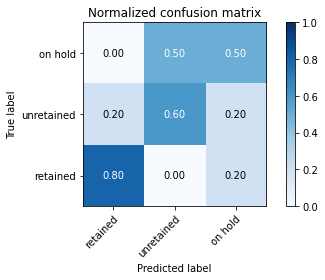

In [3]:
y_true = [0,1,0,2,1,0,0,2,1,1,0,1]
y_pred = [0,0,0,2,1,0,2,1,2,1,0,1]
target_names = np.array(['retained', 'unretained', 'on hold'])
print(classification_report(y_true, y_pred, target_names=target_names))

# Plot normalized confusion matrix
plot_confusion_matrix(y_true, y_pred,classes=target_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()